In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#  Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
data = pd.read_csv('Customer_Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data = data.drop('customerID', axis=1) 

In [4]:
# Explore the dataset's structure
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1])
print("\nData types of features:")
print(data.dtypes)

Number of samples: 7043
Number of features: 20

Data types of features:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
# Display unique values in each non-numeric column
for column in non_numeric_columns:
    unique_values = data[column].unique()
    print(f"\nUnique values in {column}:")
    print(unique_values)


Unique values in gender:
['Female' 'Male']

Unique values in Partner:
['Yes' 'No']

Unique values in Dependents:
['No' 'Yes']

Unique values in PhoneService:
['No' 'Yes']

Unique values in MultipleLines:
['No phone service' 'No' 'Yes']

Unique values in InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in OnlineSecurity:
['No' 'Yes' 'No internet service']

Unique values in OnlineBackup:
['Yes' 'No' 'No internet service']

Unique values in DeviceProtection:
['No' 'Yes' 'No internet service']

Unique values in TechSupport:
['No' 'Yes' 'No internet service']

Unique values in StreamingTV:
['No' 'Yes' 'No internet service']

Unique values in StreamingMovies:
['No' 'Yes' 'No internet service']

Unique values in Contract:
['Month-to-month' 'One year' 'Two year']

Unique values in PaperlessBilling:
['Yes' 'No']

Unique values in PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values in TotalCharges:
['29.85' '1889.5' 

In [7]:
maindata=data
# Convert 'TotalCharges' column to numeric dtype
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [8]:
# Check for missing values after conversion
missing_values = data.isnull().sum()
print("\nMissing values after conversion:")
print(missing_values)


Missing values after conversion:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Find indices of null values in the 'TotalCharges' column
null_indices = data[data['TotalCharges'].isnull()].index

# Print the indices
print("Indices of null values in the 'TotalCharges' column:")
print(null_indices)

Indices of null values in the 'TotalCharges' column:
Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [10]:
# Retrieve the data rows corresponding to the null values
null_rows = maindata.loc[null_indices]

# Print the data rows
print("Data rows corresponding to the null values in the 'TotalCharges' column:")
print(null_rows)

Data rows corresponding to the null values in the 'TotalCharges' column:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No ph

In [11]:
# Remove rows with null values
data_cleaned = data.dropna()

In [12]:
# Verify that null values are removed
print("Null values after removal:")
print(data_cleaned.isnull().sum())

Null values after removal:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
print("\nData types of features:")
print(data.dtypes)


Data types of features:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [14]:
# Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()


In [16]:
# Iterate over columns with string values and apply label encoding
for column in data_cleaned.select_dtypes(include='object'):
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])


<ipython-input-16-6ff7feb00ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])


In [17]:
# Check the updated data types
print(data_cleaned.dtypes)

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [18]:
# Perform summary statistics
summary_statistics = data.describe()
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


# Visualize the data


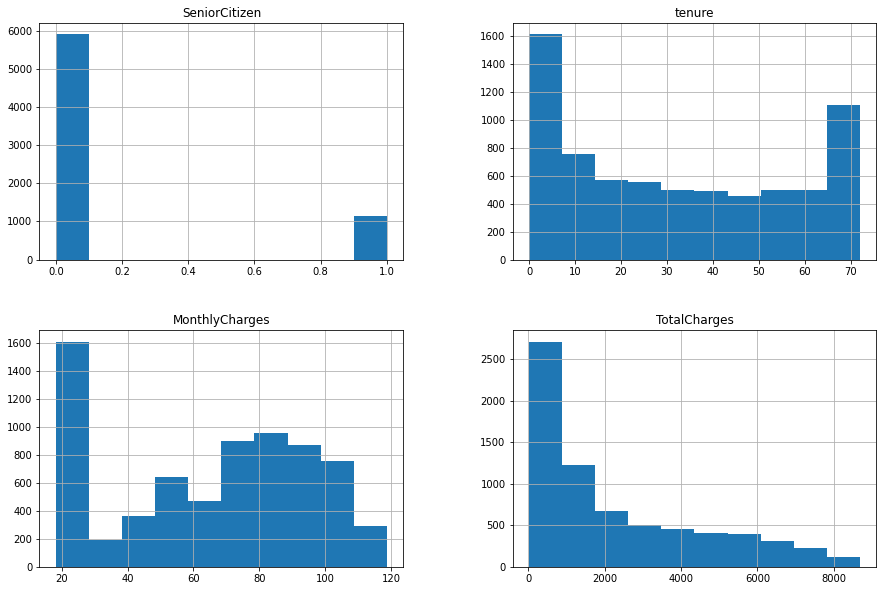

In [19]:
# Histograms for numerical features
data.hist(figsize=(15, 10))
plt.show()


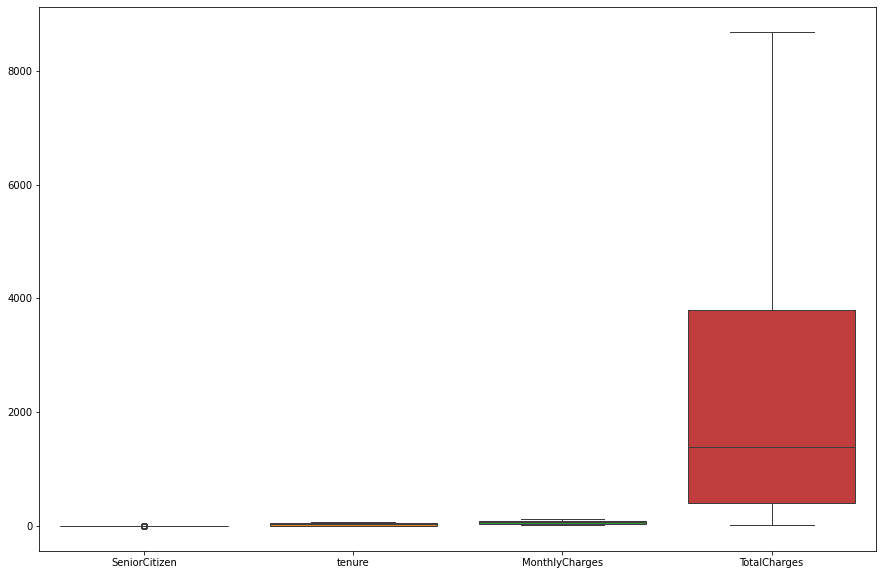

In [20]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.show()

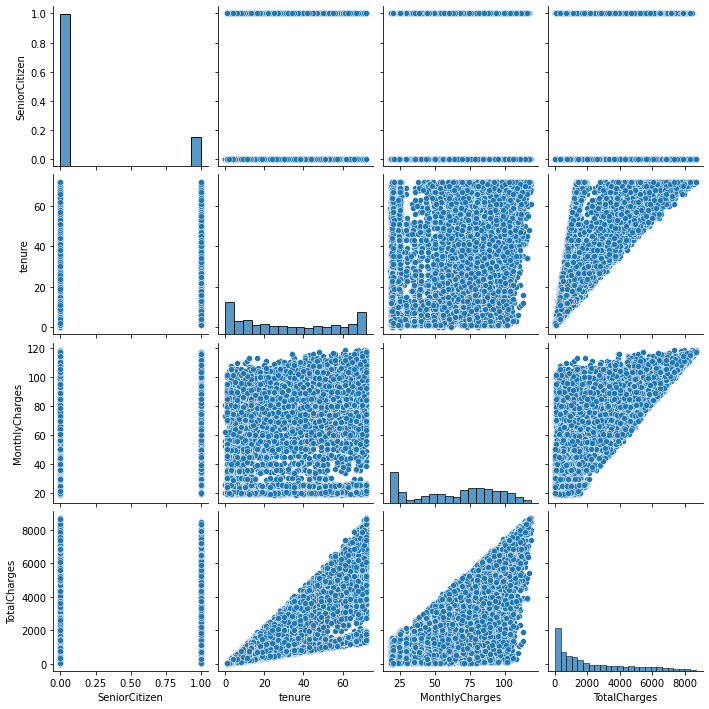

In [21]:
# Scatter plots for numerical features (pairwise relationships)
sns.pairplot(data)
plt.show()

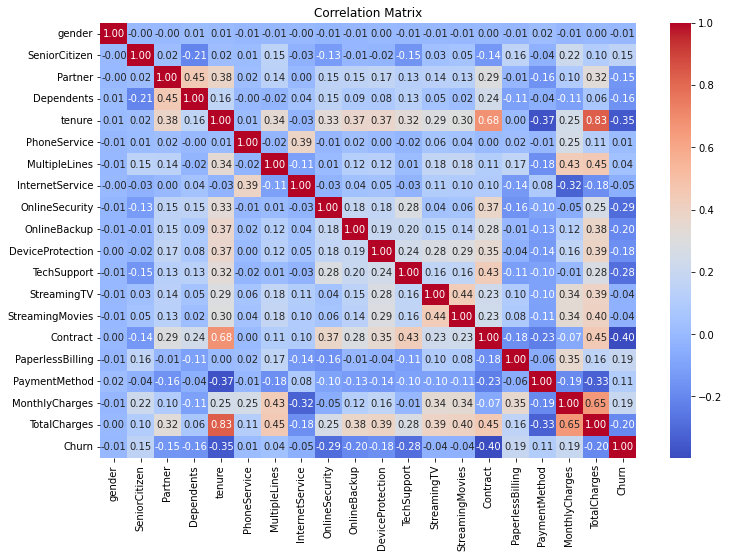

In [22]:
# Correlation matrix
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Copy the cleaned dataset to a new DataFrame for feature engineering
data_fe = data_cleaned.copy()
data_fe 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Data Preprocessing


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [25]:
# Separate features (X) and target variable (y)
X = data_fe.drop('Churn', axis=1) 
y = data_fe['Churn']

In [26]:
# Split the data into training and testing sets ( 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning & Model Development

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Initializing models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [30]:
# Hyperparameters for grid search
params = {
    'Logistic Regression': {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'Decision Tree': {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]}
}

In [31]:
# Training and evaluating models
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best training accuracy: {grid_search.best_score_:.4f}")
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Best parameters: {'C': 0.01}
Best training accuracy: 0.8029
Test accuracy: 0.7929
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Training Decision Tree...
Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best training accuracy: 0.7859
Test accuracy: 0.7773
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1549
           1       0.65      0.35      0.45       561

    accuracy                           0.78      2110
   macro avg       0.73      0.64      0.66      2110
weighted avg       0.76      0.78      0.75      2110

Training Random Forest...
Best parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimato

As we can see that all the models struggles to learn the positive Churn we will later train them with balancing the class weights


In [32]:
# Selecting the best performing model
best_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]
print(f"Best performing model: {best_model_name}")

Best performing model: Random Forest


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# Function to evaluate model and plot confusion matrix
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

Evaluating Logistic Regression...


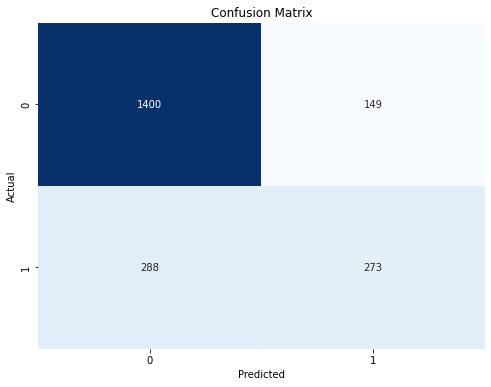

Accuracy: 0.7929
Precision: 0.6469
Recall: 0.4866
F1 Score: 0.5554
ROC AUC Score: 0.6952

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Evaluating Decision Tree...


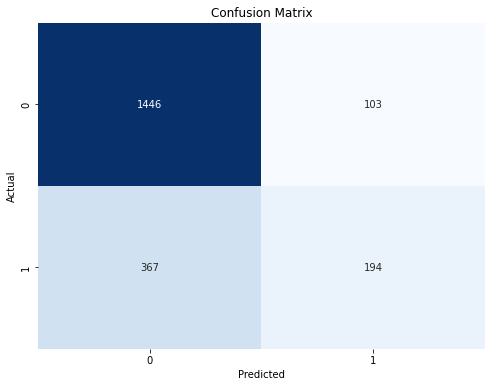

Accuracy: 0.7773
Precision: 0.6532
Recall: 0.3458
F1 Score: 0.4522
ROC AUC Score: 0.6397

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1549
           1       0.65      0.35      0.45       561

    accuracy                           0.78      2110
   macro avg       0.73      0.64      0.66      2110
weighted avg       0.76      0.78      0.75      2110

Evaluating Random Forest...


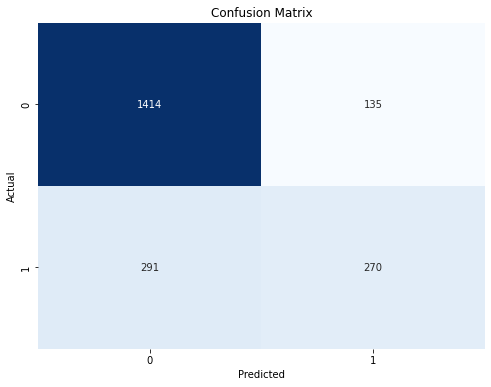

Accuracy: 0.7981
Precision: 0.6667
Recall: 0.4813
F1 Score: 0.5590
ROC AUC Score: 0.6971

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

Evaluating Gradient Boosting...


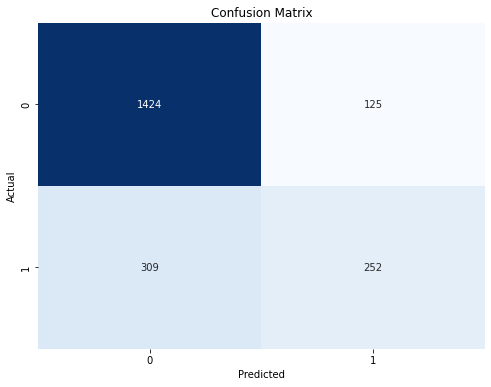

Accuracy: 0.7943
Precision: 0.6684
Recall: 0.4492
F1 Score: 0.5373
ROC AUC Score: 0.6843

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.67      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [35]:
# Evaluate models
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    print("="*30)
    evaluate_model(model, X_test, y_test)
    print("="*50)

In [36]:
# Use the best-performing model to predict customer churn on the test set
y_pred_best = best_model.predict(X_test)


In [37]:
# Calculate feature importance scores (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importance Scores:")
    print(feature_importance_df)
else:
    print("The selected model does not provide feature importance scores.")


Feature Importance Scores:
             Feature  Importance
14          Contract    0.192726
4             tenure    0.166869
18      TotalCharges    0.123417
17    MonthlyCharges    0.114387
8     OnlineSecurity    0.096520
11       TechSupport    0.084686
7    InternetService    0.059525
9       OnlineBackup    0.028420
16     PaymentMethod    0.027105
10  DeviceProtection    0.019990
15  PaperlessBilling    0.013721
6      MultipleLines    0.012333
13   StreamingMovies    0.011852
1      SeniorCitizen    0.011450
12       StreamingTV    0.010264
3         Dependents    0.009887
2            Partner    0.006589
0             gender    0.006307
5       PhoneService    0.003951


Training them with balancing the class weight

In [38]:
# Training Logistic Regression with class weight balancing
logistic_regression_balanced = LogisticRegression(class_weight='balanced', C=0.01)
logistic_regression_balanced.fit(X_train, y_train)
y_pred_lr_balanced = logistic_regression_balanced.predict(X_test)

# Training Decision Tree with class weight balancing
decision_tree_balanced = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_split=5)
decision_tree_balanced.fit(X_train, y_train)
y_pred_dt_balanced = decision_tree_balanced.predict(X_test)

# Training Random Forest with class weight balancing
random_forest_balanced = RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_split=5, n_estimators=200)
random_forest_balanced.fit(X_train, y_train)
y_pred_rf_balanced = random_forest_balanced.predict(X_test)


Logistic Regression with Class Weight Balancing:


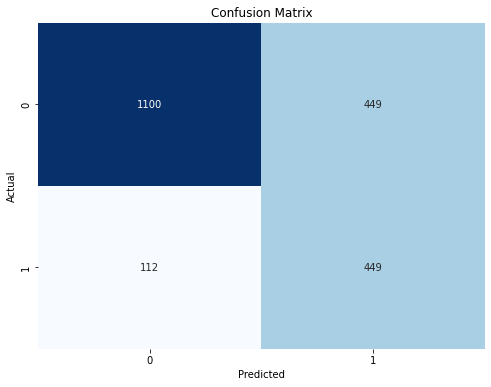

Accuracy: 0.7341
Precision: 0.5000
Recall: 0.8004
F1 Score: 0.6155
ROC AUC Score: 0.7552

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.80      0.62       561

    accuracy                           0.73      2110
   macro avg       0.70      0.76      0.71      2110
weighted avg       0.80      0.73      0.75      2110

Decision Tree with Class Weight Balancing:


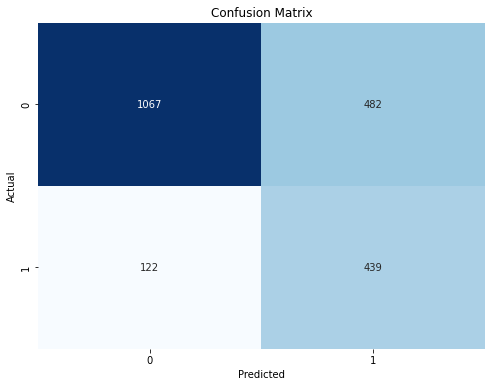

Accuracy: 0.7137
Precision: 0.4767
Recall: 0.7825
F1 Score: 0.5924
ROC AUC Score: 0.7357

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1549
           1       0.48      0.78      0.59       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.71      0.73      2110

Random Forest with Class Weight Balancing:


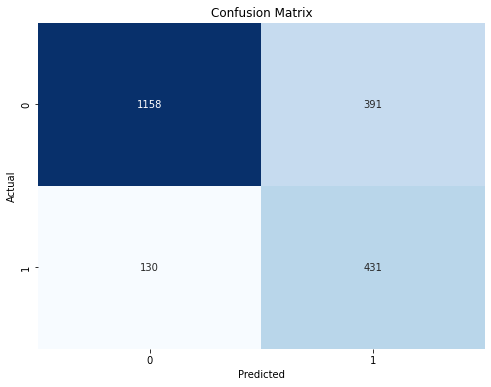

Accuracy: 0.7531
Precision: 0.5243
Recall: 0.7683
F1 Score: 0.6233
ROC AUC Score: 0.7579

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.52      0.77      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.77      2110



In [39]:

# Evaluate models
print("Logistic Regression with Class Weight Balancing:")
evaluate_model(logistic_regression_balanced, X_test, y_test)
print("="*50)

print("Decision Tree with Class Weight Balancing:")
evaluate_model(decision_tree_balanced, X_test, y_test)
print("="*50)

print("Random Forest with Class Weight Balancing:")
evaluate_model(random_forest_balanced, X_test, y_test)
print("="*50)

We still suffer from the same problem so we will apply SMOTE


In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [41]:
# Check the class distribution before applying SMOTE
print("Class distribution before applying SMOTE:", Counter(y_train))

Class distribution before applying SMOTE: Counter({0: 3614, 1: 1308})


In [42]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [43]:
# Check the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:", Counter(y_train_resampled))

Class distribution after applying SMOTE: Counter({1: 3614, 0: 3614})


In [44]:
# Training Logistic Regression with class weight balancing
logistic_regression_balanced = LogisticRegression(class_weight='balanced', C=0.01)
logistic_regression_balanced.fit(X_train_resampled, y_train_resampled)
y_pred_lr_balanced = logistic_regression_balanced.predict(X_test)

# Training Decision Tree with class weight balancing
decision_tree_balanced = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_split=5)
decision_tree_balanced.fit(X_train_resampled, y_train_resampled)
y_pred_dt_balanced = decision_tree_balanced.predict(X_test)

# Training Random Forest with class weight balancing
random_forest_balanced = RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_split=5, n_estimators=200)
random_forest_balanced.fit(X_train_resampled, y_train_resampled)
y_pred_rf_balanced = random_forest_balanced.predict(X_test)

Logistic Regression with Class Weight Balancing:


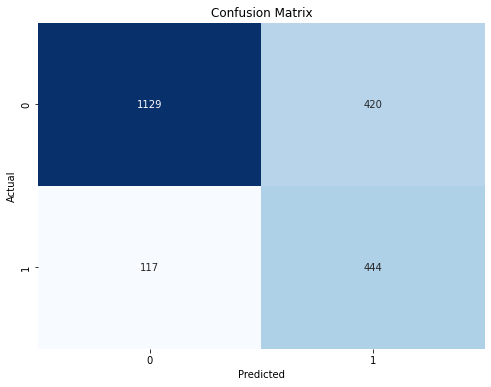

Accuracy: 0.7455
Precision: 0.5139
Recall: 0.7914
F1 Score: 0.6232
ROC AUC Score: 0.7602

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

Decision Tree with Class Weight Balancing:


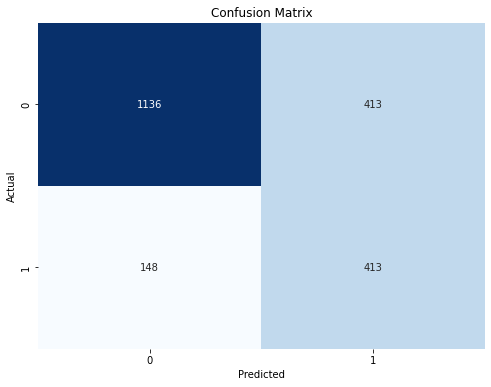

Accuracy: 0.7341
Precision: 0.5000
Recall: 0.7362
F1 Score: 0.5955
ROC AUC Score: 0.7348

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1549
           1       0.50      0.74      0.60       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.73      0.75      2110

Random Forest with Class Weight Balancing:


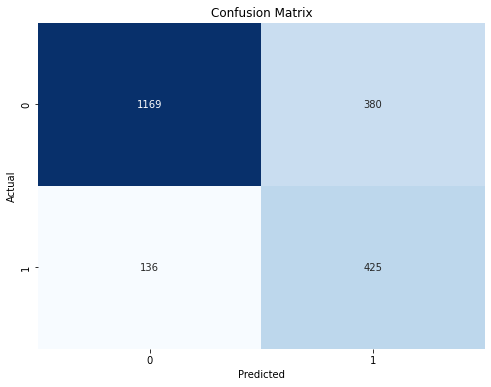

Accuracy: 0.7555
Precision: 0.5280
Recall: 0.7576
F1 Score: 0.6223
ROC AUC Score: 0.7561

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.76      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110



In [45]:

# Evaluate models
print("Logistic Regression with Class Weight Balancing:")
evaluate_model(logistic_regression_balanced, X_test, y_test)
print("="*50)

print("Decision Tree with Class Weight Balancing:")
evaluate_model(decision_tree_balanced, X_test, y_test)
print("="*50)

print("Random Forest with Class Weight Balancing:")
evaluate_model(random_forest_balanced, X_test, y_test)
print("="*50)

It's still an issue let's try undersampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler


In [47]:
# Apply Random Undersampling to reduce the instances in the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


In [48]:
# Training Logistic Regression with class weight balancing
logistic_regression_balanced = LogisticRegression(class_weight='balanced', C=0.01)
logistic_regression_balanced.fit(X_train_undersampled, y_train_undersampled)
y_pred_lr_balanced = logistic_regression_balanced.predict(X_test)

# Training Decision Tree with class weight balancing
decision_tree_balanced = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_split=5)
decision_tree_balanced.fit(X_train_undersampled, y_train_undersampled)
y_pred_dt_balanced = decision_tree_balanced.predict(X_test)

# Training Random Forest with class weight balancing
random_forest_balanced = RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_split=5, n_estimators=200)
random_forest_balanced.fit(X_train_undersampled, y_train_undersampled)
y_pred_rf_balanced = random_forest_balanced.predict(X_test)

Logistic Regression with Class Weight Balancing:


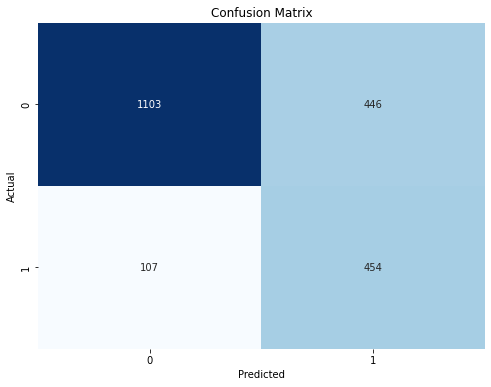

Accuracy: 0.7379
Precision: 0.5044
Recall: 0.8093
F1 Score: 0.6215
ROC AUC Score: 0.7607

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.81      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Decision Tree with Class Weight Balancing:


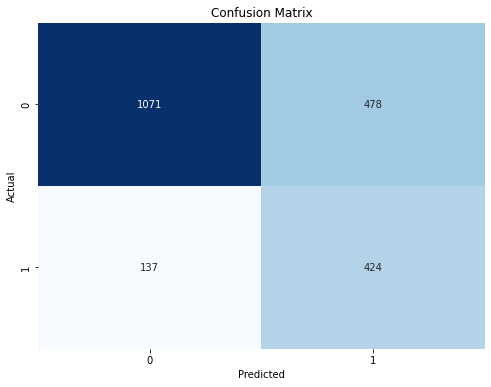

Accuracy: 0.7085
Precision: 0.4701
Recall: 0.7558
F1 Score: 0.5796
ROC AUC Score: 0.7236

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1549
           1       0.47      0.76      0.58       561

    accuracy                           0.71      2110
   macro avg       0.68      0.72      0.68      2110
weighted avg       0.78      0.71      0.72      2110

Random Forest with Class Weight Balancing:


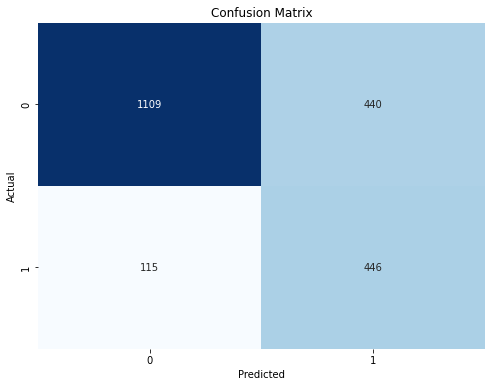

Accuracy: 0.7370
Precision: 0.5034
Recall: 0.7950
F1 Score: 0.6164
ROC AUC Score: 0.7555

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.50      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.70      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



In [49]:
# Evaluate models
print("Logistic Regression with Class Weight Balancing:")
evaluate_model(logistic_regression_balanced, X_test, y_test)
print("="*50)

print("Decision Tree with Class Weight Balancing:")
evaluate_model(decision_tree_balanced, X_test, y_test)
print("="*50)

print("Random Forest with Class Weight Balancing:")
evaluate_model(random_forest_balanced, X_test, y_test)
print("="*50)

It's still an issue let's try another approach

In [50]:
# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

In [51]:
# Define the hyperparameter grid for GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01 ,0.01, 0.1, 0.5]
}

In [52]:
# Perform GridSearchCV to find the best hyperparameters
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.01, 0.1, 0.5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [53]:
# Get the best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

In [54]:
# Evaluate the best Gradient Boosting model
print("Best parameters:", gb_grid_search.best_params_)
print("Best training accuracy:", gb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best training accuracy: 0.8047583673806281


In [55]:
# Test the Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Test accuracy: 0.7985781990521327
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Let's try it with oversample and undersample


Oversample

In [56]:
# Perform GridSearchCV to find the best hyperparameters
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.01, 0.1, 0.5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [57]:
# Get the best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

In [58]:
# Evaluate the best Gradient Boosting model
print("Best parameters:", gb_grid_search.best_params_)
print("Best training accuracy:", gb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best training accuracy: 0.8393935304168043


In [59]:
# Test the Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Test accuracy: 0.7838862559241706
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1549
           1       0.58      0.65      0.61       561

    accuracy                           0.78      2110
   macro avg       0.73      0.74      0.73      2110
weighted avg       0.79      0.78      0.79      2110



We can see some improvement from 57 to 61 Let's see the UnderSample

UnderSample

In [60]:
# Perform GridSearchCV to find the best hyperparameters
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train_undersampled, y_train_undersampled)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.01, 0.1, 0.5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [61]:
# Get the best Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

In [62]:
# Evaluate the best Gradient Boosting model
print("Best parameters:", gb_grid_search.best_params_)
print("Best training accuracy:", gb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'n_estimators': 300}
Best training accuracy: 0.7691146205829551


In [63]:
# Test the Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Test accuracy: 0.7293838862559242
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1549
           1       0.49      0.79      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.79      0.73      0.74      2110



It's tha same for the positive but worse for the negative Churn

In [64]:
# Calculate feature importance scores 
if hasattr(best_gb_model, 'feature_importances_'):
    feature_importance = best_gb_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importance Scores:")
    print(feature_importance_df)
else:
    print("The selected model does not provide feature importance scores.")


Feature Importance Scores:
             Feature  Importance
14          Contract    0.590613
17    MonthlyCharges    0.122104
4             tenure    0.121398
8     OnlineSecurity    0.051967
11       TechSupport    0.045033
18      TotalCharges    0.031177
7    InternetService    0.009113
13   StreamingMovies    0.007656
15  PaperlessBilling    0.007354
9       OnlineBackup    0.005227
16     PaymentMethod    0.003291
6      MultipleLines    0.002529
12       StreamingTV    0.001213
3         Dependents    0.001094
0             gender    0.000231
10  DeviceProtection    0.000000
1      SeniorCitizen    0.000000
5       PhoneService    0.000000
2            Partner    0.000000


# Data Analysis based on Feature Importance

In [65]:
# Group the data by contract type and churn status
contract_churn_counts = data.groupby(['Contract', 'Churn']).size().unstack()


<Figure size 720x432 with 0 Axes>

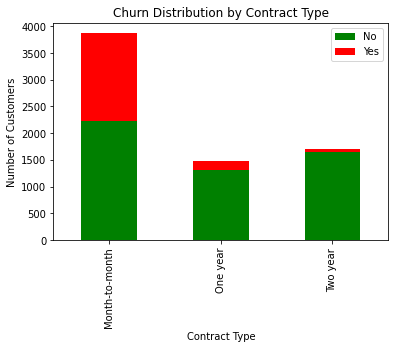

In [68]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
contract_churn_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
# Add labels and title
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Contract Type')
plt.legend()

In [69]:
# Set the style of seaborn
sns.set(style="whitegrid")

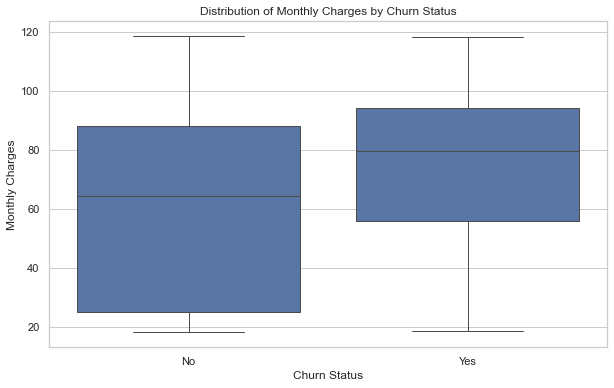

In [72]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churn Status')
# Show plot
plt.show()

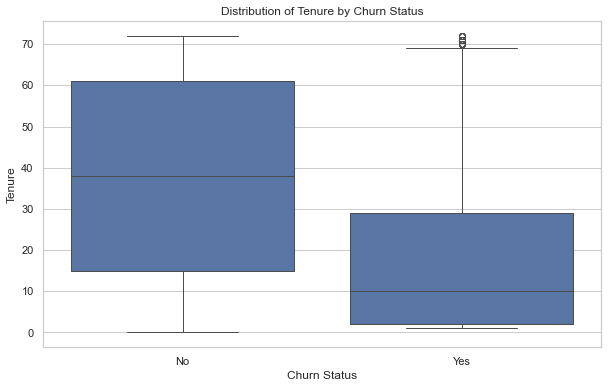

In [73]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="tenure", data=data)

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.title('Distribution of Tenure by Churn Status')

# Show plot
plt.show()

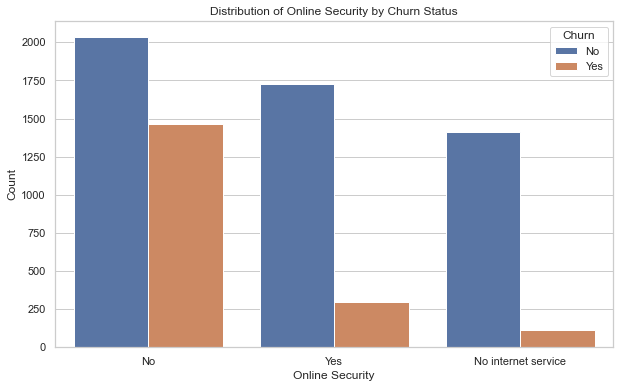

In [74]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x="OnlineSecurity", hue="Churn", data=data)

# Add labels and title
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.title('Distribution of Online Security by Churn Status')

# Show plot
plt.show()

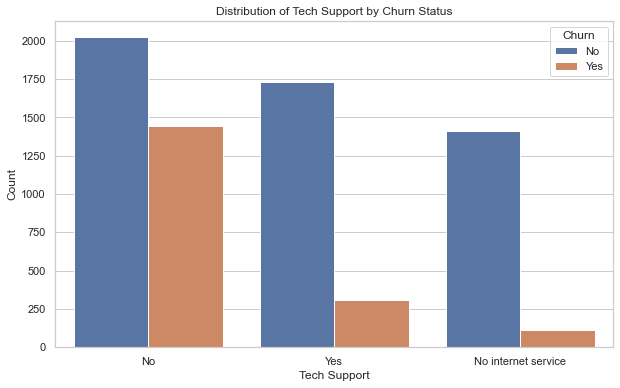

In [75]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x="TechSupport", hue="Churn", data=data)

# Add labels and title
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Distribution of Tech Support by Churn Status')

# Show plot
plt.show()

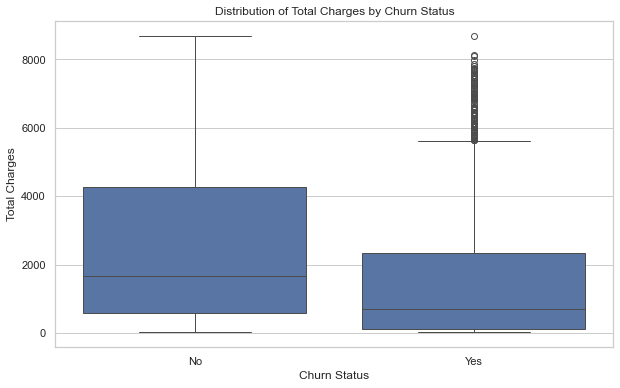

In [76]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="TotalCharges", data=data)

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges by Churn Status')

# Show plot
plt.show()

# Save the Model

In [77]:
import joblib
joblib.dump(best_gb_model, 'gradientBoosting_churn_prediction_model.pkl')

['gradientBoosting_churn_prediction_model.pkl']